# Práctica 2. _Clustering_ de regiones vinícolas

En una práctica anterior ya utilizamos los datos de las características de unos vinos pertenecientes a tres bodegas italianas (fichero de datos ``wines`` o ``wine.csv`` que se puede encontrar en el libro de la asignatura. 

En esta práctica vamos a aplicar un aprendizaje no supervisado como el que propone los mapas auto-organizativo de Kohonen para obtener un agrupamiento de los datos.

## Cargar el paquete específico

A continuación cargamos el paquete específico que vamos a usar en esta sección para trabajar con mapas auto-organizativos de Kohonen realizado en Python:


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
#!git clone https://github.com/cgg-upm/upm-dma-som
#!dir upm-dma-som\som
#!copy upm-dma-som\som\som.py .\*.*
#!copy upm-dma-som\som\utils.py .\*.*

In [2]:
from som import som
from utils import somutils

## Carga de los datos.

Cargamos el archivo  con ``data("wines")`` que ya contiene el nombre de cada columna y no incluye la primera de las columnas que indica la bodega a la que pertenecen los datos de cada instancia (fila).  

En el caso de los mapas auto-organizativos, donde se va a establecer una relación de proximidad entre los atributos, es conveniente escalar los datos.

Estos datos provienen de

https://archive.ics.uci.edu/ml/datasets/Wine

In [3]:
# Se preparan las columnas a tratar
df_wine = pd.read_csv('data/wine.csv', header=None)
df_wine.columns = ['label', 'alcohol',
    'malic acid', 'ash',
    'ash alkalinity',
    'magnesium', 'tot. phenols',
    'flavanoids', 'non-flav. phenols',
    'proanth',
    'col. int.', 'col. hue',
    'OD ratio'
    ,'proline']
# Se borra la columna de la etiqueta
df_wine = df_wine.drop('label', axis=1)
df_wine.head()

alcohol  malic acid   ash  ash alkalinity  magnesium  tot. phenols  \
0    14.23        1.71  2.43            15.6        127          2.80   
1    13.20        1.78  2.14            11.2        100          2.65   
2    13.16        2.36  2.67            18.6        101          2.80   
3    14.37        1.95  2.50            16.8        113          3.85   
4    13.24        2.59  2.87            21.0        118          2.80   

   flavanoids  non-flav. phenols  proanth  col. int.  col. hue  OD ratio  \
0        3.06               0.28     2.29       5.64      1.04      3.92   
1        2.76               0.26     1.28       4.38      1.05      3.40   
2        3.24               0.30     2.81       5.68      1.03      3.17   
3        3.49               0.24     2.18       7.80      0.86      3.45   
4        2.69               0.39     1.82       4.32      1.04      2.93   

   proline  
0     1065  
1     1050  
2     1185  
3     1480  
4      735

In [4]:
"Número de filas :",  df_wine.values.shape[0], " Número de columnas :", df_wine.values.shape[1]

('Número de filas :', 178, ' Número de columnas :', 13)

In [5]:
scaler = StandardScaler()
X = df_wine.to_numpy()
X_std = scaler.fit_transform(X)
X_std.shape, X.shape

((178, 13), (178, 13))

In [6]:
df=pd.DataFrame(X_std)
columnas = ['alcohol','malic acid','ash',
    'ash alkalinity',
    'magnesium', 'tot. phenols',
    'flavanoids', 'non-flav. phenols',
    'proanth',
    'col. int.', 'col. hue',
    'OD ratio'
    ,'proline']
df.columns = columnas

df.head()

alcohol  malic acid       ash  ash alkalinity  magnesium  tot. phenols  \
0  1.518613   -0.562250  0.232053       -1.169593   1.913905      0.808997   
1  0.246290   -0.499413 -0.827996       -2.490847   0.018145      0.568648   
2  0.196879    0.021231  1.109334       -0.268738   0.088358      0.808997   
3  1.691550   -0.346811  0.487926       -0.809251   0.930918      2.491446   
4  0.295700    0.227694  1.840403        0.451946   1.281985      0.808997   

   flavanoids  non-flav. phenols   proanth  col. int.  col. hue  OD ratio  \
0    1.034819          -0.659563  1.224884   0.251717  0.362177  1.847920   
1    0.733629          -0.820719 -0.544721  -0.293321  0.406051  1.113449   
2    1.215533          -0.498407  2.135968   0.269020  0.318304  0.788587   
3    1.466525          -0.981875  1.032155   1.186068 -0.427544  1.184071   
4    0.663351           0.226796  0.401404  -0.319276  0.362177  0.449601   

    proline  
0  1.013009  
1  0.965242  
2  1.395148  
3  2.334574  
4 -0.037874

## Definir y entrenar el SOM 

La elección de la red bidimensional, tanto en lo que se refiere al número de neuronas como en tipo de entorno, depende del tipo de datos que se esté analizando. En este caso concreto, estamos tratando con instancias que contienen trece atributos y parece conveniente empezar con una malla de $5 \times 5$ neuronas que denominaremos ``som_wine``

In [7]:
nrows = 5
ncols = 5
dimensions = X_std.shape[1]
#dimensions = X.shape[1]
#vicinity = "rectangular"
vicinity = "hexagonal"
som_wine = som(nrows=nrows,
          ncols=ncols,
          dimension=dimensions,
          vicinity=vicinity)
som_wine.train_SOM(train_data=X_std,
              epochs=10)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 28.21it/s]


## Resumen del mapa SOM

Comandos específicos de este paquete permiten obtener un resumen de las caracterísiticas del mapa generado. En concreto, la asignación de cada instancia a una neurona del SOM.

In [10]:
redXY = somutils.getRedSOM(pSom=som_wine)
df=pd.DataFrame(redXY.T)
cols_=[]
for i in range(som_wine.nrows):
    for j in range(som_wine.ncols):
        cols_.append("N(" + str(i) + "," + str(j)+")")
df.columns=cols_
df.insert(loc = 0, column = '', value = ['x','y'])
pd.set_option('display.max_columns', None)
df.head(len(df))

N1    N2    N3    N4    N5   N6    N7    N8    N9   N10   N11   N12  \
0  x  0.87  2.60  4.33  6.06  7.79  2.6  4.33  6.06  7.79  9.53  0.87  2.60   
1  y  6.73  6.73  6.73  6.73  6.73  5.3  5.30  5.30  5.30  5.30  3.87  3.87   

    N13   N14   N15   N16   N17   N18   N19   N20   N21  N22   N23   N24   N25  
0  4.33  6.06  7.79  2.60  4.33  6.06  7.79  9.53  0.87  2.6  4.33  6.06  7.79  
1  3.87  3.87  3.87  2.43  2.43  2.43  2.43  2.43  1.00  1.0  1.00  1.00  1.00

In [14]:
df=pd.DataFrame(som_wine.getCodes())
df.columns = columnas
df.head(len(df))

alcohol  malic acid       ash  ash alkalinity  magnesium  tot. phenols  \
0   1.118660   -0.439818  0.170988       -0.978464   0.390204      1.179482   
1   0.823506   -0.451143  0.817574       -0.269501   0.778437      0.886280   
2  -0.094426   -0.422711  0.890206        0.685920   1.102863      0.710904   
3  -0.927541   -0.666616 -0.383976       -0.151583   0.294839      0.295482   
4  -0.926944   -0.016138 -0.891453       -0.070535  -0.677695      0.656616   
5   1.124451   -0.265270 -0.131122       -1.101480   0.665591      1.011665   
6   0.820392   -0.402517  0.029353       -0.889296   0.134550      0.573243   
7   0.289536   -0.304369  0.582758       -0.184226   0.311944      0.393630   
8  -0.533035   -0.264845 -0.152866        0.257915   0.077772      0.121004   
9  -0.799355   -0.665380 -1.249432       -0.269835  -0.658554     -0.185267   
10  0.806571    0.374124 -0.054972       -0.557881   0.300171      0.495446   
11  0.343145    0.080746  0.149751       -0.222048   0.217031     -0.040036   
12 -0.315693    0.010514  0.148301        0.163566   0.253669     -0.430158   
13 -0.642263   -0.281213 -0.344207        0.367332  -0.487977     -0.438740   
14 -1.133653   -0.637461 -0.119162        0.657924  -0.824077     -0.290002   
15  0.606440    0.568985  0.244826        0.188311   0.332009     -0.248212   
16  0.347237    0.678939  0.161807        0.284593   0.124245     -0.634487   
17 -0.106596    0.560684 -0.067107        0.185676   0.106180     -1.174343   
18 -0.515914    0.395111 -0.184756        0.230042  -0.249101     -1.024667   
19 -0.881068    0.066244  0.243498        0.718331  -0.677574     -0.793752   
20  0.488421    0.697812  0.654223        0.937702   0.503631     -0.731395   
21  0.319742    1.084054  0.070103        0.407846  -0.358215     -0.963284   
22  0.051436    0.877738 -0.240270        0.318410  -0.354413     -1.229535   
23 -0.209557    0.942480  0.469832        0.755944  -0.283836     -0.891864   
24 -0.474725   -0.251794 -0.052602        0.020604  -0.290433     -0.552042   

    flavanoids  non-flav. phenols   proanth  col. int.  col. hue  OD ratio  \
0     1.258905          -0.663509  1.041480   0.598224  0.577160  0.645062   
1     0.923331          -0.317008  0.428948   0.232361  0.729886  0.575058   
2     0.775821          -0.298339  0.674127  -0.428259  0.708628  0.678341   
3     0.252228          -0.668582  0.681696  -0.765150  0.452518  0.451436   
4     0.566440          -0.501276  0.760950  -0.831100  0.132880  0.573395   
5     1.039798          -0.864737  0.688255   0.270879  0.161743  1.020413   
6     0.728417          -0.557741  0.291648  -0.008481  0.495416  0.716816   
7     0.543197          -0.500398  0.168165  -0.234072  0.508162  0.661107   
8     0.183090          -0.253416  0.095137  -0.753254  0.439380  0.488752   
9    -0.076114          -0.398579 -0.234780  -0.855090  0.667414  0.333695   
10    0.547584          -0.532592  0.132454   0.186106 -0.108246  0.530386   
11    0.065763          -0.341570 -0.129419   0.116382 -0.091674  0.053389   
12   -0.295983          -0.265418 -0.291878  -0.340407 -0.042689 -0.127399   
13   -0.242682           0.118943 -0.355425  -0.732923  0.324115  0.074656   
14   -0.157568           0.406662 -0.245444  -1.001885  0.887965  0.165771   
15   -0.375925          -0.029910 -0.100340   1.067621 -0.879148 -0.538066   
16   -0.731731           0.148098 -0.441458   0.975838 -1.008807 -0.863100   
17   -1.026848          -0.085842 -0.980505   0.362549 -0.987922 -1.116832   
18   -0.853114           0.617788 -0.788149  -0.377206 -0.419476 -0.659460   
19   -0.431586           1.152861 -0.355837  -0.779553  0.096004 -0.164712   
20   -0.989713           0.321795 -0.184405   1.931283 -1.471377 -1.405892   
21   -1.264209           0.811039 -0.664374   1.454207 -1.440817 -1.344643   
22   -1.338656           0.972707 -0.932370   0.440699 -1.077153 -1.237594   
23   -1.198824           1.410127 -1.001209  -0.080023 -0.491135 -0.904986   


## Dibujo de la matriz de distancias unificadas (U-Matrix)

Contiene la distancia entre los nodos del SOM. En el gráfico a más intensidad hay una menor distancia entre las neuronas adyacentes. Para cada neurona se calcula la distancia entre ella y sus neuronas vecinas más próximas. Cuanto menor sea el resultado, más próxima estará la neurona con sus vecinas.

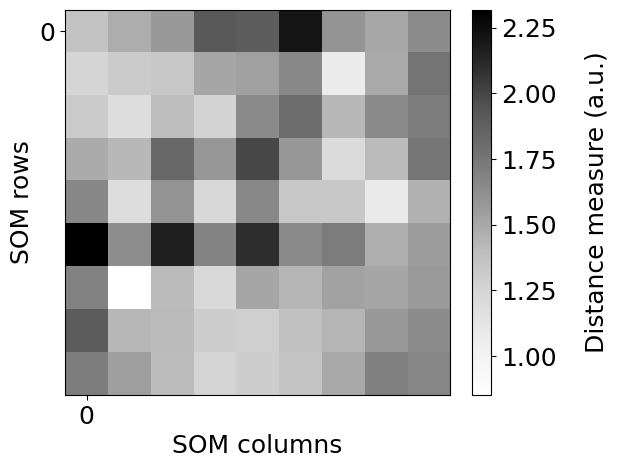

In [13]:
somutils.plot_u_matrix(pSom=som_wine, figsize=(7,5))

## Número de instancias asociadas a cada neurona

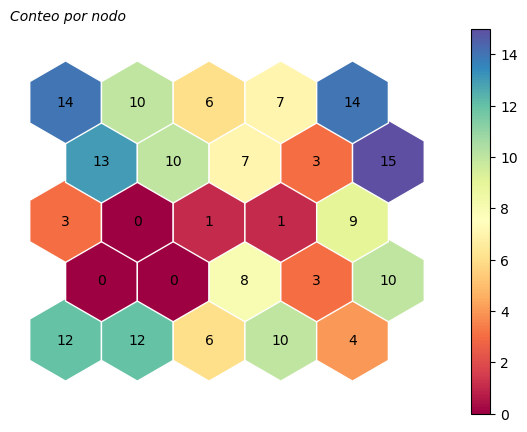

In [12]:
somutils.plot_neurPointsCount(pSom=som_wine, figsize=(7,5))

## Gráfico de códigos

Otro gráfico muy útil para entender el agrupamiento de los datos es el que representa la distribución de los atributos en cada neurona, esto es el vector representativo al que ha convergido cada neurona después del entrenamiento. Haz esta figura y comenta cómo están agrupados los datos en `wine.csv`. 

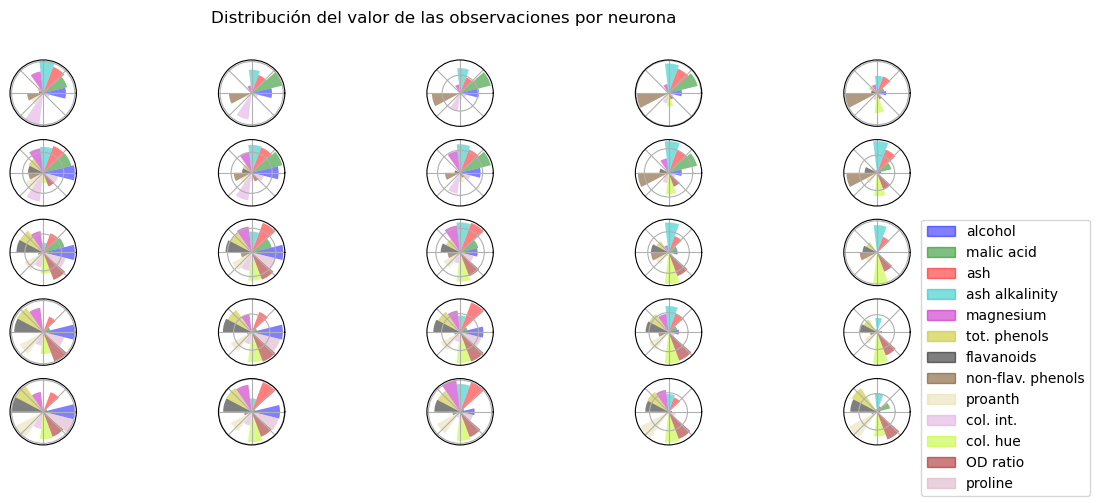

In [13]:
somutils.plot_valuesMap(pSom=som_wine, labels=columnas, figsize=(13,5))

## _Clustering_


Podemos realizar un _clustering_ jerárquico con la función `plot_Cluster_hexagon` usando las distancias entre los vectores prototípicos de las neuronas y añadirlo a la representación.

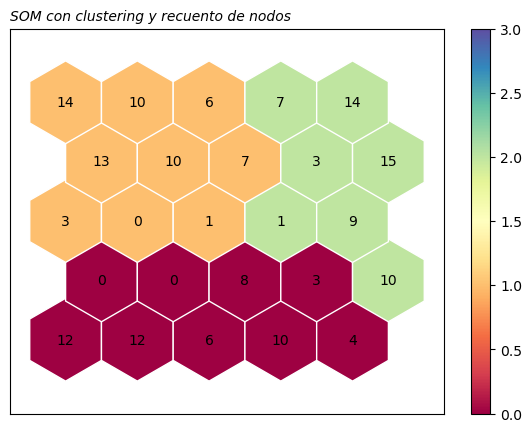

In [14]:
somutils.plot_Cluster(pSom=som_wine, n_clusters=3, figsize=(7,5))

In [15]:
som_wine.data_map[0][0]

[1, 21, 30, 31, 55, 60, 68, 71, 76, 94, 108, 110, 150, 158]